In [1]:
import torch
from rdkit import Chem
import pandas as pd
from metrics import get_total_metrics
from graphics import get_heatmap, get_differential_heatmap, get_pairs_heatmap

# Best baseline model
## Metrics calculating

In [2]:
drug_target_data = pd.read_csv('../analysis/bindingdb_ki_d_t_aff_smiles_split.csv')
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']
test_data_cleaned = test_data[~test_data['smiles'].apply(Chem.MolFromSmiles).isna()]

In [7]:
pred_DTI_best_baseline = torch.load('../analysis/DTI_BDB_best_vary_all_2904')

In [ ]:
test_data_cleaned.insert(4, 'predicted', pred_DTI_best_baseline)
test_data_cleaned.head()

In [9]:
test_data_cleaned.to_csv('../analysis/DTI_BDB_best_vary_all_2904_preds.csv', index=False)

In [ ]:
results = get_total_metrics(test_data_cleaned, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

In [11]:
results.head()

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,884727,0.767681,0.719354,-54.410535,0.790373
1,0.0,0.1,883706,0.767577,0.719141,-54.410648,0.790283
2,0.0,0.3,665931,0.766896,0.713379,-58.409922,0.777471
3,0.0,0.5,216699,0.799860,0.674662,-1.736432,0.751955
4,0.0,0.7,97203,0.807869,0.677040,-31.467762,0.728824


In [12]:
results.to_csv('../analysis/DTI_BDB_best_vary_all_2904_metrics.csv', index=False)

## Heatmaps

In [28]:
results_DTI_BDB_best_baseline = pd.read_csv('../analysis/DTI_BDB_best_vary_all_2904_metrics.csv')

In [14]:
results_DTI_BDB_best_baseline.head()

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,884727,0.767681,0.719354,-54.410535,0.790373
1,0.0,0.1,883706,0.767577,0.719141,-54.410648,0.790283
2,0.0,0.3,665931,0.766896,0.713379,-58.409922,0.777471
3,0.0,0.5,216699,0.799860,0.674662,-1.736432,0.751955
4,0.0,0.7,97203,0.807869,0.677040,-31.467762,0.728824


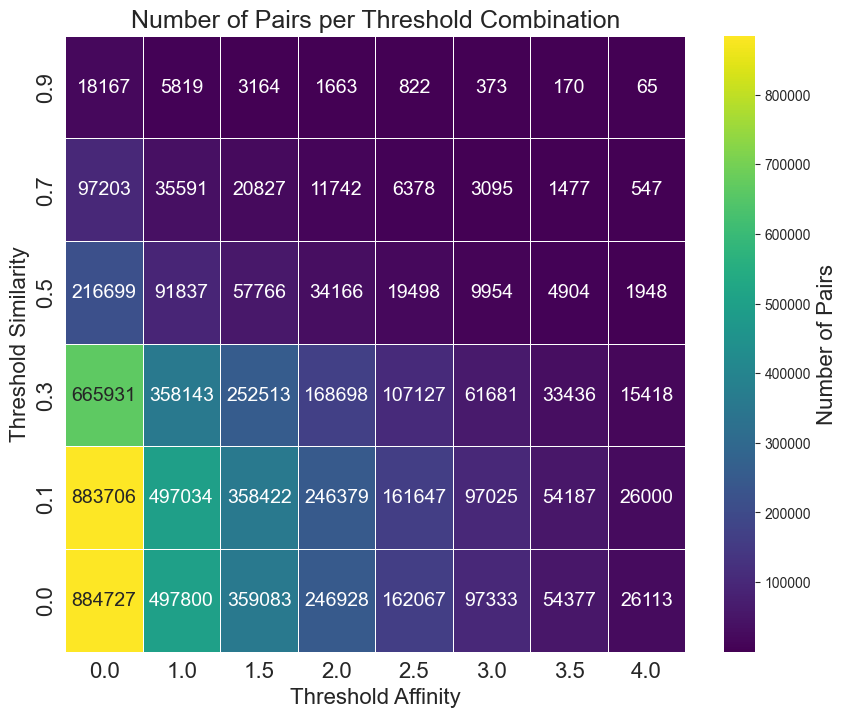

In [29]:
get_pairs_heatmap(results_DTI_BDB_best_baseline, 'DTI')

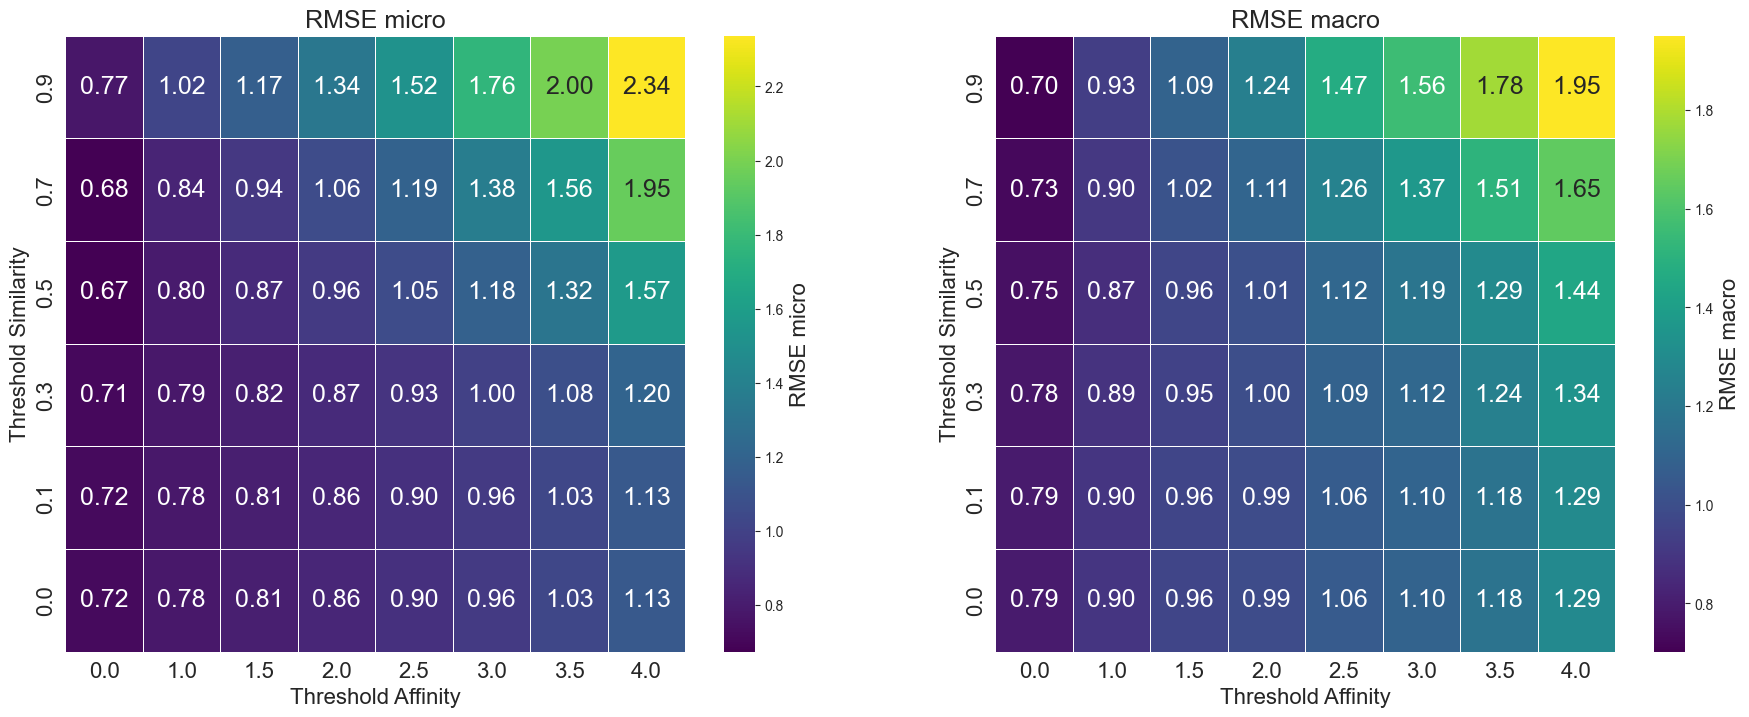

In [30]:
get_heatmap(results_DTI_BDB_best_baseline, 'both', model_name='DTI_BDB_baseline_best', save_fig=True)

# Transfer learning
## Metrics

In [18]:
drug_target_data = pd.read_csv('../analysis/bindingdb_ki_d_t_aff_smiles_split.csv')
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']
test_data_cleaned = test_data[~test_data['smiles'].apply(Chem.MolFromSmiles).isna()]

In [15]:
pred_DTI_best_TL = torch.load('../analysis/DTI_BDB_best_tl_2904')

In [19]:
test_data_cleaned.insert(4, 'predicted', pred_DTI_best_TL)
test_data_cleaned.head()

,drug,smiles,target,affinity,predicted
62902,"Cocaine::Cocaine (-)::methyl (1R,2R,3S,5S)-3-(...",COC(=O)[C@@H]1[C@H]2CC[C@@H](C[C@@H]1OC(=O)c1c...,504,5.952725,6.411373
62903,"US9062078, 162::US9475819, 162::US9637496, 162...",CCOc1ccnc(Cl)c1C(=O)N1C2CCC1C(COc1ccccn1)C2,77,5.000000,5.114037
62904,(1E)-5-methoxy-1-[4-(trifluoromethyl)phenyl]pe...,COCCCC\C(=N/OCCN)c1ccc(cc1)C(F)(F)F,504,5.845576,5.745947
62905,5-(2-(4-(benzo[d]isothiazol-3-yl)piperazin-1-y...,Clc1cc2NC(=O)Cc2cc1CCN1CCN(CC1)c1nsc2ccccc12,275,9.552842,9.435935
62906,"US9090618, H30b(ii)::US9598411, Ref. No. H30b(ii)",OC(=O)CN1CCC[C@@H]1c1nc2ccccc2n1[C@@H]1C[C@@H]...,379,8.045757,7.258320


In [20]:
test_data_cleaned.to_csv('../analysis/DTI_BDB_best_TL_2904_preds.csv', index=False)

In [ ]:
results = get_total_metrics(test_data_cleaned, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

In [22]:
results.to_csv('../analysis/DTI_BDB_best_TL_2904_metrics.csv', index=False)

## Heatmaps

In [23]:
results_DTI_BDB_best_TL = pd.read_csv('../analysis/DTI_BDB_best_TL_2904_metrics.csv')

In [25]:
results_DTI_BDB_best_TL.head()

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,884727,0.762899,0.726720,-47.986461,0.809444
1,0.0,0.1,883706,0.762774,0.726532,-47.986602,0.809287
2,0.0,0.3,665931,0.766094,0.714606,-49.660475,0.802594
3,0.0,0.5,216699,0.825698,0.629609,-8.519684,0.781986
4,0.0,0.7,97203,0.852486,0.593243,-41.174755,0.754116


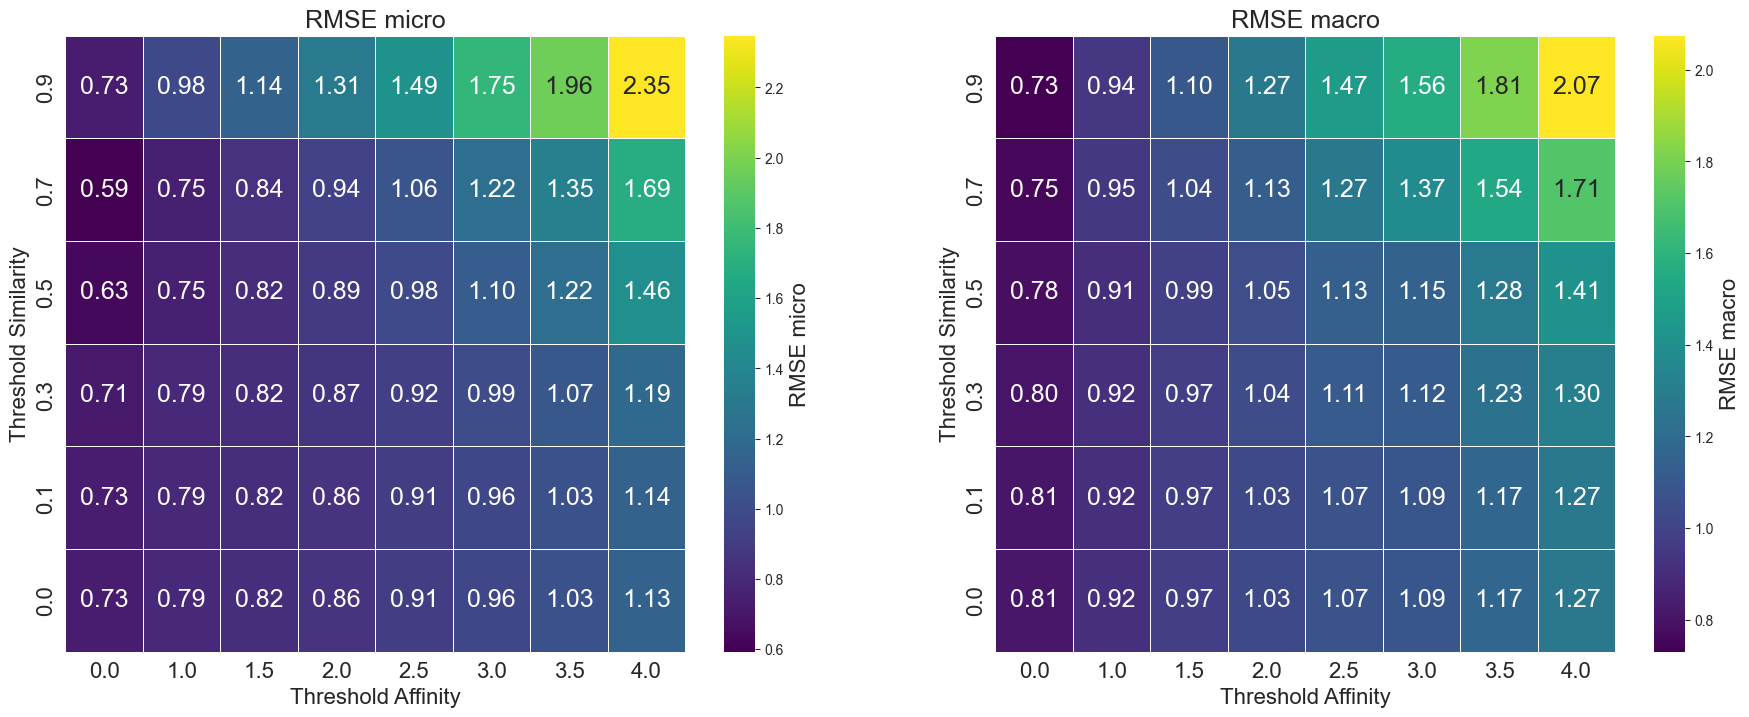

In [27]:
get_heatmap(results_DTI_BDB_best_TL, 'both', model_name='DTI_BDB_TL_best', save_fig=True)

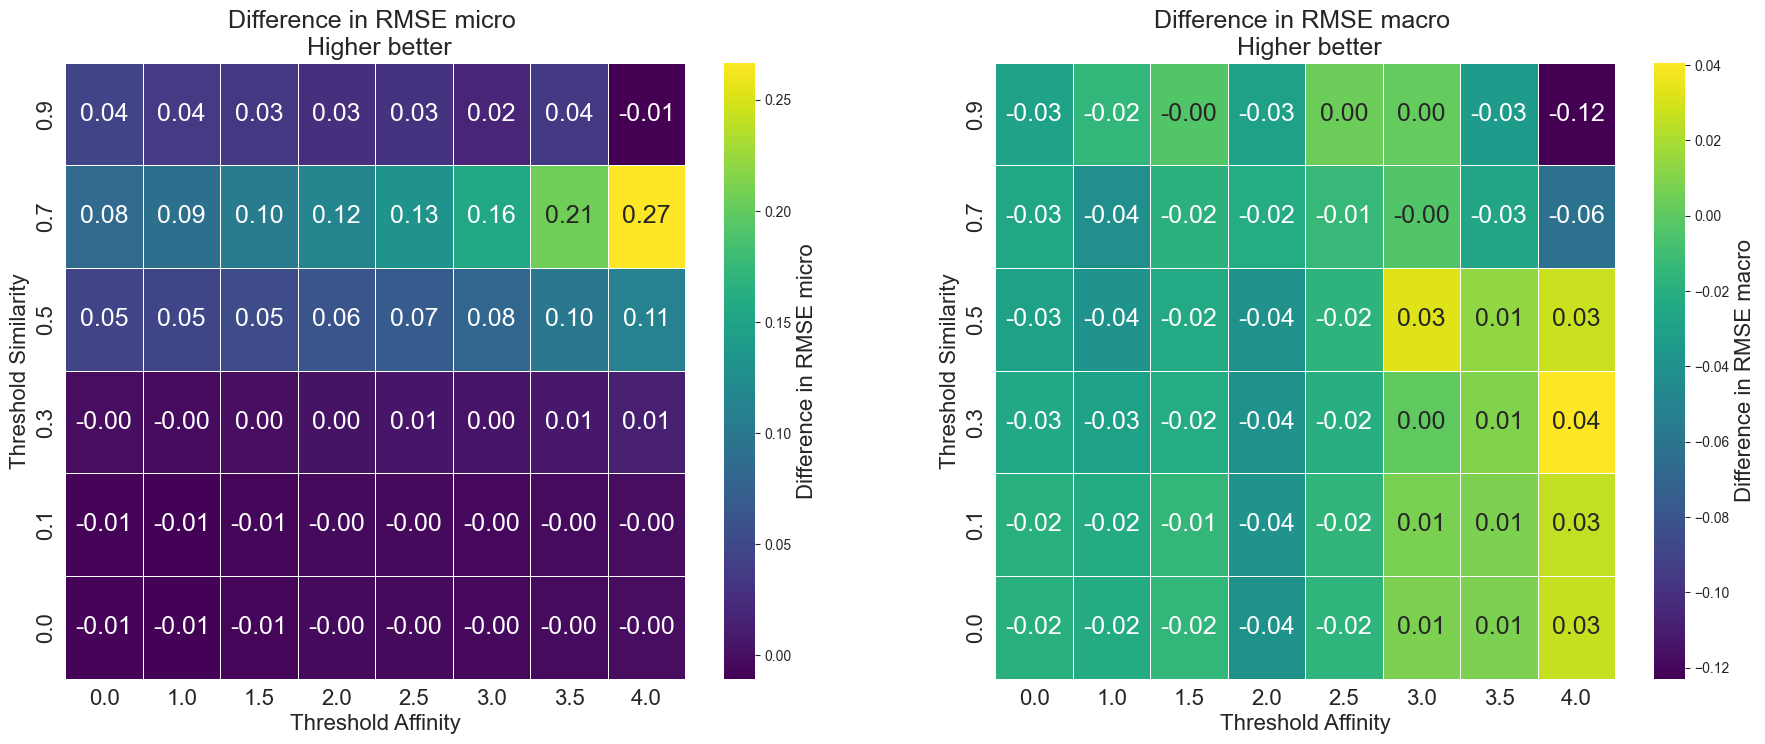

In [33]:
get_differential_heatmap(results_DTI_BDB_best_baseline, results_DTI_BDB_best_TL, 'both', 'DTI_BDB_baseline_best_vs_best_TL', save_fig=True)